In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\019d2669aceeb48cabffaedecee8b9bd.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\0239a424aeaf329a4a2d2def5b3494b2.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\0bfde992c25d5e7b22fbe30e4df3ef17.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\0e2acae667e954415bafc6efff0ae1d8.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\12fcfb41691a143ae38579c82bf7b597.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\134067d3be21d7415572107486213d46.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\13520ec1dc67d6a89bb0ded4996dc0db.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\2275f2dc500b3a2cb0e19f3bec58cd24.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\29d78067aa6d101b8acbc02177a99b36.jpg
D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Classic\2d32488

In [2]:
import os
import pandas as pd

# Directory containing the input images
input_dir = 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset'

# List to hold the image data
image_data = []

# Walk through the directory to get folder names, subfolder names, and image paths
for dirname, subdirs, filenames in os.walk(input_dir):
    # Extract folder and subfolder names from the path
    path_parts = dirname.split(os.sep)
    folder_name = path_parts[-2] if len(path_parts) > 1 else None
    subfolder_name = path_parts[-1] if len(path_parts) > 1 else None
    
    for filename in filenames:
        # Full path of the image
        image_url = os.path.join(dirname, filename)
        # Append data as a row: Filename, Folder name, Subfolder name, Image URL
        image_data.append([filename, folder_name, subfolder_name, image_url])

# Convert the data into a pandas DataFrame
df = pd.DataFrame(image_data, columns=['Filename', 'Folder', 'Subfolder', 'ImageURL'])

# Define the output CSV file path
output_file = 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\house.csv'

# Save to CSV file
df.to_csv(output_file, index=False)
print(f"CSV file created at {output_file}")


CSV file created at D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\house.csv


In [3]:
dataset = df
dataset.head(10)

,Filename,Folder,Subfolder,ImageURL
0,019d2669aceeb48cabffaedecee8b9bd.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
1,0239a424aeaf329a4a2d2def5b3494b2.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
2,0bfde992c25d5e7b22fbe30e4df3ef17.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
3,0e2acae667e954415bafc6efff0ae1d8.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
4,12fcfb41691a143ae38579c82bf7b597.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
5,134067d3be21d7415572107486213d46.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
6,13520ec1dc67d6a89bb0ded4996dc0db.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
7,2275f2dc500b3a2cb0e19f3bec58cd24.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
8,29d78067aa6d101b8acbc02177a99b36.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...
9,2d32488b7320bce7223140bc828446a3.jpg,AR_dataset,ML-AR-Classic,D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_da...


In [4]:
import cv2
from skimage.io import imread
import tensorflow as tf
from keras.applications.resnet import ResNet50, preprocess_input 
from keras.layers import GlobalMaxPooling2D
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

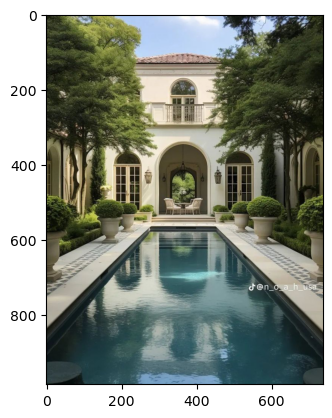

In [5]:
a = imread(dataset['ImageURL'][0])
plt.imshow(a)

In [6]:
model = ResNet50(weights = 'imagenet', input_shape = (224,224, 3), include_top = False)
model.trainable = False
model = tf.keras.Sequential([
    model, 
    GlobalMaxPooling2D()
])
model.save('model_file.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
def extract_features_from_img(img_path, model) : 
    print(type(img_path))
    img = imread(img_path)
    img = cv2.resize(img, (224,224))
    img = np.array(img)
    img_expanded = np.expand_dims(img, axis = 0)
    preprocessed = preprocess_input(img_expanded)
    result = model.predict(preprocessed).flatten()
    normalised = result / norm(result)
    return normalised

In [8]:
filenames = dataset['ImageURL'].to_list()

In [9]:
import tqdm
features = []
for file in filenames:
    features.append(extract_features_from_img(file, model))
print(len(features))


<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
<class 'str'>


In [10]:
# ss = pickle.dumps(features)
# with open('file.pkl', 'wb') as file:
#     # A new file will be created
#     pickle.dump(features, file)

import pickle

pickle.dump(features, open('featurevector.pkl', 'wb'))
pickle.dump(filenames, open('filenames.pkl', 'wb'))


In [25]:
filename = pickle.load(open("filenames.pkl", "rb"))
print(filename)

['D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\019d2669aceeb48cabffaedecee8b9bd.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\0239a424aeaf329a4a2d2def5b3494b2.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\0bfde992c25d5e7b22fbe30e4df3ef17.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\0e2acae667e954415bafc6efff0ae1d8.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\12fcfb41691a143ae38579c82bf7b597.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\134067d3be21d7415572107486213d46.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\13520ec1dc67d6a89bb0ded4996dc0db.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\2275f2dc500b3a2cb0e19f3bec58cd24.jpg', 'D:\\Real Estate\\_PLP-ML-AI\\00-TRAIN-ML-AR\\AR_dataset\\ML-AR-Classic\\29d78067aa6d101b8acbc02177a99b

In [11]:
# with open('/kaggle/input/pickle-file/file.pkl', 'rb') as file :
#     features = pickle.load(file)
    
with open(r'D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\file.pkl', 'rb') as file :
    features = pickle.load(file)

In [12]:
from sklearn.neighbors import NearestNeighbors
neighbours = NearestNeighbors(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')
neighbours.fit(features)
distance, indices = neighbours.kneighbors([extract_features_from_img(filenames[3], model)])

<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


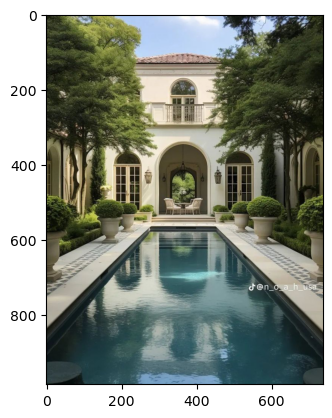

In [13]:
img1 = imread(filenames[indices[0][1]])
plt.imshow(img1)

<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


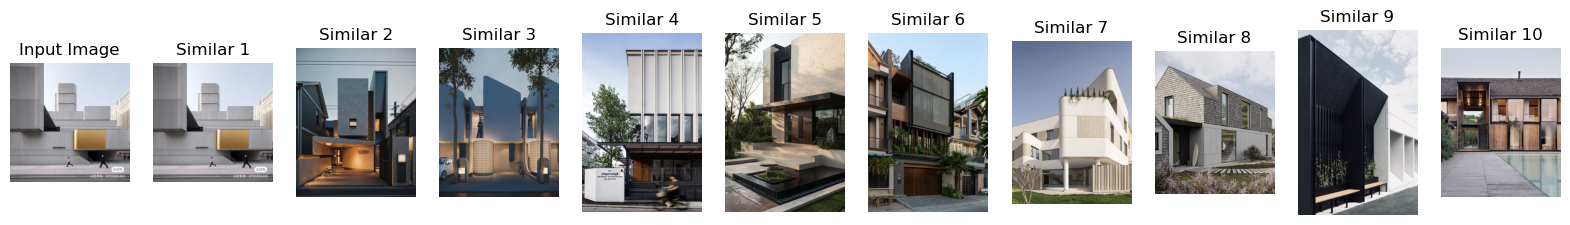

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from PIL import Image

# Assuming 'features' is your dataset of extracted image features.
neighbours = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')
neighbours.fit(features)

# Extract features from the model image and find the 10 closest images.
distance, indices = neighbours.kneighbors([extract_features_from_img(filenames[50], model)])

# Display the input image and the top 10 similar images
def show_similar_images(input_image_path, similar_indices):
    fig, axes = plt.subplots(1, 11, figsize=(20, 16))
    
    # Display the input image on the far left
    input_image = Image.open(input_image_path)
    axes[0].imshow(input_image)
    axes[0].set_title("Input Image")
    axes[0].axis("off")
    
    # Display the top 10 similar images
    for i, idx in enumerate(similar_indices[0]):
        similar_image = Image.open(filenames[idx])
        axes[i + 1].imshow(similar_image)
        axes[i + 1].set_title(f"Similar {i+1}")
        axes[i + 1].axis("off")
    
    plt.show()

# Call the function
show_similar_images(filenames[50], indices)


In [15]:
# import numpy as np

# # Assuming 'sample_index' is the index of a sample you want to test
# sample_index = 120
# distances, indices = neighbours.kneighbors([features[sample_index]])

# # Display indices and distances for the sample
# print("Indices of Nearest Neighbors:", indices)
# print("Distances to Nearest Neighbors:", distances)


Accuracy: 0.80
Confusion Matrix:
[[29  0  0]
 [ 4 23  2]
 [ 8  3 18]]


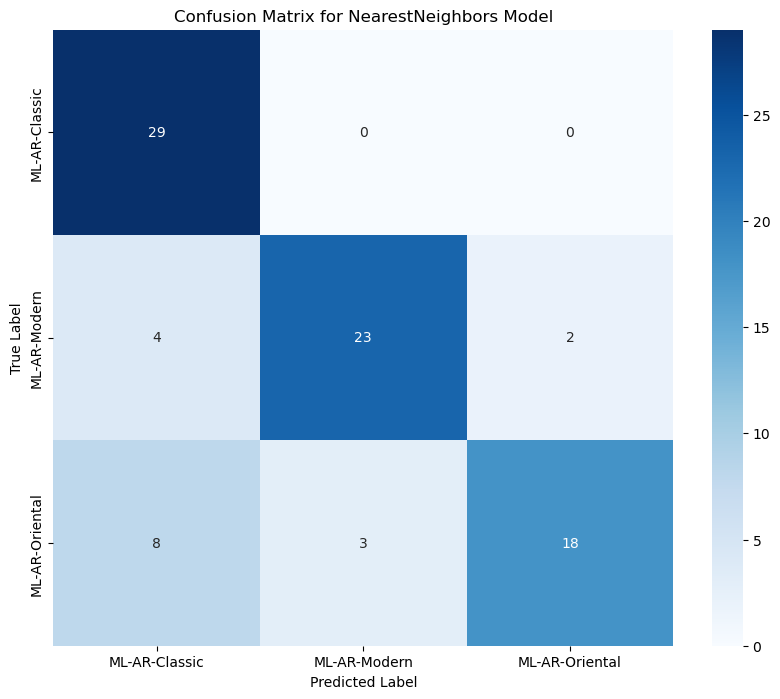

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Assuming df, features, filenames, and neighbours (NearestNeighbors model) are predefined

# Extract true labels from the DataFrame
true_labels = df['Subfolder'].values

# Initialize lists to store results
predicted_labels = []

# Loop through each image and find its nearest neighbors
for idx, feature in enumerate(features):
    # Find nearest neighbors for the current image
    _, indices = neighbours.kneighbors([feature])
    
    # Get the true label for the current image
    true_label = df.iloc[idx]['Subfolder']
    
    # Get the labels of the nearest neighbors
    neighbor_labels = df.iloc[indices[0]]['Subfolder'].values
    
    # Predict the most frequent label among the neighbors, excluding the current image itself
    predicted_label = max(set(neighbor_labels[1:]), key=list(neighbor_labels[1:]).count)  # Skipping first index as it's self
    predicted_labels.append(predicted_label)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for NearestNeighbors Model")
plt.show()


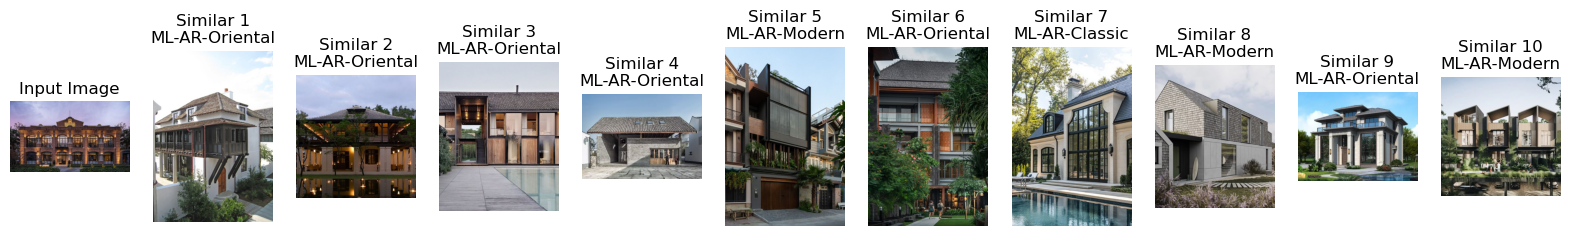

In [17]:
# Function to display input image and top 10 similar images with subfolder labels
def show_similar_images(input_image_path, similar_indices, df):
    fig, axes = plt.subplots(1, 11, figsize=(20, 16))
    
    # Display the input image on the far left
    input_image = Image.open(input_image_path)
    axes[0].imshow(input_image)
    axes[0].set_title("Input Image")
    axes[0].axis("off")
    
    # Display the top 10 similar images with subfolder labels
    for i, idx in enumerate(similar_indices[0]):
        similar_image = Image.open(filenames[idx])
        # Match the subfolder label from the DataFrame
        similar_filename = filenames[idx].split(os.sep)[-1]  # Ensure consistent directory separator
        matching_row = df[df['Filename'] == similar_filename]
        
        # Check if there is a matching row
        if not matching_row.empty:
            subfolder_label = matching_row['Subfolder'].values[0]
        else:
            subfolder_label = "Unknown"  # Fallback label if no match is found
            
        # Show the image and label with subfolder
        axes[i + 1].imshow(similar_image)
        axes[i + 1].set_title(f"Similar {i+1}\n{subfolder_label}")
        axes[i + 1].axis("off")
    
    plt.show()

# Call the function
show_similar_images(filenames[1], indices, df)


Similarity with true label 'ML-AR-Classic': 10.00%


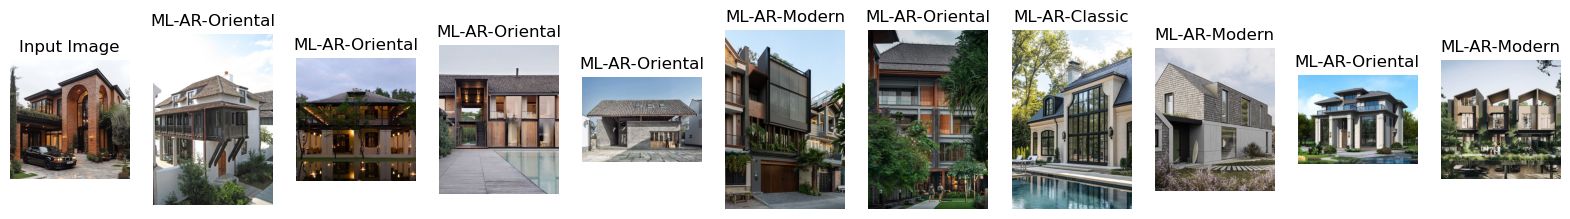

In [18]:
import os

# Function to display input image, top 10 similar images, and similarity percentage for true label
def show_similar_images_with_similarity(input_image_path, similar_indices, df):
    fig, axes = plt.subplots(1, 11, figsize=(20, 16))
    
    # Display the input image on the far left
    input_image = Image.open(input_image_path)
    axes[0].imshow(input_image)
    axes[0].set_title("Input Image")
    axes[0].axis("off")
    
    # Get true label for the input image
    input_filename = os.path.basename(input_image_path)  # Ensure consistent filename extraction
    true_label_row = df[df['Filename'] == input_filename]
    
    # Check if true label is found
    if not true_label_row.empty:
        true_label = true_label_row['Subfolder'].values[0]
    else:
        true_label = "Unknown"  # Fallback label if no match is found
        print(f"Warning: True label not found for input image '{input_filename}'.")
    
    # Display the top 10 similar images with subfolder labels and count matches
    match_count = 0
    for i, idx in enumerate(similar_indices[0]):
        similar_image = Image.open(filenames[idx])
        similar_filename = os.path.basename(filenames[idx])
        similar_row = df[df['Filename'] == similar_filename]
        
        # Check if a subfolder label exists for the similar image
        if not similar_row.empty:
            subfolder_label = similar_row['Subfolder'].values[0]
        else:
            subfolder_label = "Unknown"
        
        # Check if the label matches the true label
        if subfolder_label == true_label:
            match_count += 1
        
        # Show the image and label with subfolder
        axes[i + 1].imshow(similar_image)
        axes[i + 1].set_title(f"{subfolder_label}")
        axes[i + 1].axis("off")
    
    # Calculate similarity percentage
    similarity_percentage = (match_count / 10) * 100
    print(f"Similarity with true label '{true_label}': {similarity_percentage:.2f}%")
    
    plt.show()

# Call the function
show_similar_images_with_similarity(filenames[20], indices, df)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from PIL import Image
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display

# Assuming df, features, filenames, and model are predefined
# Set up nearest neighbors
neighbours = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')
neighbours.fit(features)

# Function to extract features from an image using a predefined model
def extract_features_from_img2(image, model):
    # Convert the PIL image to a NumPy array if it's not already
    if isinstance(image, Image.Image):
        image = np.array(image)

    # Resize the image to 224x224 pixels for the model
    image = cv2.resize(image, (224, 224))

    # Expand dimensions to fit the model's input shape
    img_expanded = np.expand_dims(image, axis=0)
    preprocessed = preprocess_input(img_expanded)

    # Predict features using the model and flatten the result
    result = model.predict(preprocessed).flatten()

    # Normalize the feature vector
    normalized = result / norm(result)
    return normalized

# Function to display input image, top 10 similar images, and similarity percentage for true label
import os

# Function to display input image, top 10 similar images, and similarity percentage for true label
def show_similar_images_with_similarity(input_image, similar_indices, df, true_label="Uploaded_Label"):
    fig, axes = plt.subplots(1, 11, figsize=(20, 16))

    # Display the input image on the far left
    axes[0].imshow(input_image)
    axes[0].set_title("Input Image")
    axes[0].axis("off")

    # Display the top 10 similar images with subfolder labels and count matches
    match_count = 0
    for i, idx in enumerate(similar_indices[0]):
        similar_image = Image.open(filenames[idx])
        similar_filename = os.path.basename(filenames[idx])  # Extract just the filename
        
        # Fetch the subfolder label from df for each similar image
        similar_row = df[df['Filename'] == similar_filename]
        
        # Check if a matching row is found
        if not similar_row.empty:
            subfolder_label = similar_row['Subfolder'].values[0]
        else:
            subfolder_label = "Unknown"  # Default label if no match is found

        # Check if the label matches the provided true label
        if subfolder_label == true_label:
            match_count += 1

        # Show the image and label with subfolder
        axes[i + 1].imshow(similar_image)
        axes[i + 1].set_title(f"{subfolder_label}")
        axes[i + 1].axis("off")

    plt.show()


# Widget for file upload
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
output_widget = widgets.Output()

# Display widgets
display(upload_widget, output_widget)

# Create a button for fetching similar images
predict_button = widgets.Button(description="Get Similar Images")

import numpy as np
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from numpy.linalg import norm

# Define function for handling button click
def on_predict_button_clicked(b):
    with output_widget:
        output_widget.clear_output()  # Clear previous outputs
        if upload_widget.value:
            # Load uploaded image
            file_info = list(upload_widget.value.values())[0]
            img = Image.open(BytesIO(file_info['content']))

            # Display the uploaded image
#             display(img)

            # Extract features and find similar images
            img_features = extract_features_from_img2(img, model)
            distances, indices = neighbours.kneighbors([img_features])

            # Display similar images with similarity percentage
            show_similar_images_with_similarity(img, indices, df)

# Attach function to button click event
predict_button.on_click(on_predict_button_clicked)

# Display the prediction button
display(predict_button)


FileUpload(value={}, accept='image/*', description='Upload')

Output()

Button(description='Get Similar Images', style=ButtonStyle())

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from PIL import Image
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display

# Assuming df, features, filenames, and model are predefined
# Set up nearest neighbors
neighbours = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')
neighbours.fit(features)

# Function to extract features from an image using a predefined model
def extract_features_from_img2(image, model):
    # Convert the PIL image to a NumPy array if it's not already
    if isinstance(image, Image.Image):
        image = np.array(image)

    # Resize the image to 224x224 pixels for the model
    image = cv2.resize(image, (224, 224))

    # Expand dimensions to fit the model's input shape
    img_expanded = np.expand_dims(image, axis=0)
    preprocessed = preprocess_input(img_expanded)

    # Predict features using the model and flatten the result
    result = model.predict(preprocessed).flatten()

    # Normalize the feature vector
    normalized = result / norm(result)
    return normalized

# Function to display input image, top 10 similar images, and similarity percentage for true label
import os

# Function to display input image, top 10 similar images, and similarity percentage for true label
def show_similar_images_with_similarity(input_image, similar_indices, df, distances, true_label="Uploaded_Label"):
    fig, axes = plt.subplots(1, 11, figsize=(20, 16))
    
    # Display the input image on the far left
    axes[0].imshow(input_image)
    axes[0].set_title("Input Image")
    axes[0].axis("off")

    # Initialize variables for tracking matching labels and locations below the similarity threshold
    match_count = 0
    location_list = []  # List for locations meeting similarity criteria
    threshold = 0.20  # Define similarity threshold

    print("Similarity Scores and Filenames:")
    # Loop through each similarity score and corresponding index for the top 10 similar images
    for i, (idx, sim_score) in enumerate(zip(similar_indices[0], distances[0])):
        # Print each similarity score for debugging
        print(f"Score: {sim_score}, Filename: {filenames[idx]}")
        
        # Only process images below the threshold
        if sim_score > threshold:
            similar_image = Image.open(filenames[idx])
            similar_filename = os.path.basename(filenames[idx])  # Extract just the filename
            
            # Fetch the subfolder label from df for each similar image
            similar_row = df[df['Filename'] == similar_filename]
            
            # Check if a matching row is found and retrieve subfolder label
            if not similar_row.empty:
                subfolder_label = similar_row['Subfolder'].values[0]
            else:
                subfolder_label = "Unknown"  # Default label if no match is found

            # Check if the label matches the provided true label
            if subfolder_label == true_label:
                match_count += 1

            # Add location info for passing threshold
            location_list.append(similar_filename)  

            # Show the image and label with subfolder
            axes[i + 1].imshow(similar_image)
            axes[i + 1].set_title(f"{subfolder_label}")
            axes[i + 1].axis("off")

    # Print the count and locations that met the similarity threshold criteria
    print("Total count below threshold:", len(location_list))
    print("Locations meeting criteria:", location_list)
    
    plt.show()


# Widget for file upload
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
output_widget = widgets.Output()

# Display widgets
display(upload_widget, output_widget)

# Create a button for fetching similar images
predict_button = widgets.Button(description="Get Similar Images")

import numpy as np
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from numpy.linalg import norm

# Define function for handling button click
def on_predict_button_clicked(b):
    with output_widget:
        output_widget.clear_output()  # Clear previous outputs
        if upload_widget.value:
            # Load uploaded image
            file_info = list(upload_widget.value.values())[0]
            img = Image.open(BytesIO(file_info['content']))

            # Display the uploaded image
#             display(img)

            # Extract features and find similar images
            img_features = extract_features_from_img2(img, model)
            distances, indices = neighbours.kneighbors([img_features])

            # Display similar images with similarity percentage
            show_similar_images_with_similarity(img, indices, df, distances)  # Pass distances as an argument


# Attach function to button click event
predict_button.on_click(on_predict_button_clicked)

# Display the prediction button
display(predict_button)


FileUpload(value={}, accept='image/*', description='Upload')

Output()

Button(description='Get Similar Images', style=ButtonStyle())

In [21]:
filenames = dataset['ImageURL'].to_list()

In [22]:
import os
import cv2
import tkinter as tk
from PIL import Image as PILImage, ImageTk
import matplotlib.pyplot as plt

# Function to display input image, top 10 similar images, and similarity percentage for true label
def get_image_recommendations_with_similarity(image_path, model, neighbors, filenames, df):
    # Extract features and get nearest neighbors
    input_image_features = extract_features_from_img(image_path, model)
    distance, similar_indices = neighbors.kneighbors([input_image_features])
    
    # Create the Tkinter window
    root = tk.Tk()
    root.title("Image Recommendations")
    
    # Display the input image in the Tkinter window
    input_image = PILImage.open(image_path)
    input_image = input_image.resize((224, 224), PILImage.LANCZOS)
    input_img_tk = ImageTk.PhotoImage(input_image)
    label = tk.Label(root, image=input_img_tk)
    label.image = input_img_tk
    label.pack(side="top", padx=10, pady=10)
    
    # Get the true label for the input image
    input_filename = os.path.basename(image_path)
    true_label_row = df[df['Filename'] == input_filename]
    true_label = true_label_row['Subfolder'].values[0] if not true_label_row.empty else "Unknown"
    
    # Display the top 10 similar images and count matches with the true label
    match_count = 0
    for idx in similar_indices[0][:10]:  # Display top 10 similar images
        recommended_image_path = filenames[idx]
        similar_image = cv2.imread(recommended_image_path)
        similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)
        similar_image_pil = PILImage.fromarray(similar_image)
        similar_image_pil = similar_image_pil.resize((224, 224), PILImage.LANCZOS)
        
        img_tk = ImageTk.PhotoImage(similar_image_pil)
        label = tk.Label(root, image=img_tk)
        label.image = img_tk
        label.pack(side="left", padx=5, pady=5)
        
        # Get the label of the similar image
        similar_filename = os.path.basename(recommended_image_path)
        similar_row = df[df['Filename'] == similar_filename]
        subfolder_label = similar_row['Subfolder'].values[0] if not similar_row.empty else "Unknown"
        
        # Count if the label matches the true label
        if subfolder_label == true_label:
            match_count += 1

    # Calculate and display similarity percentage
    similarity_percentage = (match_count / 10) * 100
    print(f"Similarity with true label '{true_label}': {similarity_percentage:.2f}%")

    root.mainloop()

# Call the function
get_image_recommendations_with_similarity(
    image_path=filenames[20], 
    model=model, 
    neighbors=neighbours, 
    filenames=filenames, 
    df=df
)


<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Similarity with true label 'ML-AR-Classic': 70.00%


In [23]:
get_image_recommendations(r'D:\Real Estate\_PLP-ML-AI\00-TRAIN-ML-AR\AR_dataset\ML-AR-Modern\55b048bce555acddcf19c95d2d31a2fd.jpg', model, neighbours, filenames)

NameError: name 'get_image_recommendations' is not defined

In [ ]:
# from IPython.display import display
# import ipywidgets as widgets
# from PIL import Image
# import tensorflow as tf
# import numpy as np
# # Function to load and preprocess an image
# model = neighbours
# def preprocess_image(img):
#     img = img.resize((224, 224))  # Resize to model's input shape
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0) / 255.0
#     return img_array

# # Function to make predictions and get recommendations
# def make_prediction(image):
#     processed_image = preprocess_image(image)
#     prediction = model.predict(processed_image)
#     # Here, you could convert prediction to recommendations
#     return prediction  # Modify this return value based on recommendation logic

# # Create the file upload widget
# upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

# # Create output widget to display image and recommendations
# output_widget = widgets.Output()

# # Display widgets
# display(upload_widget, output_widget)

# # Create prediction button
# predict_button = widgets.Button(description="Get Recommendation")

# # Define the prediction function for button click
# def on_predict_button_clicked(b):
#     with output_widget:
#         output_widget.clear_output()  # Clear previous outputs
#         if upload_widget.value:
#             file_info = list(upload_widget.value.values())[0]
#             img = Image.open(file_info['content'])  # Open uploaded image

#             # Display the uploaded image
#             display(img)

#             # Run the model for prediction and get recommendations
#             prediction = make_prediction(img)
#             print("Recommended items:", prediction)  # Example output; adjust to display recommendation details

# # Attach the prediction function to the button click
# predict_button.on_click(on_predict_button_clicked)

# # Display the prediction button
# display(predict_button)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.neighbors import NearestNeighbors
# from PIL import Image
# import tensorflow as tf
# import numpy as np
# import ipywidgets as widgets
# from IPython.display import display
# from io import BytesIO  # Import BytesIO to handle binary content

# # Assuming 'features' is your dataset of extracted image features and 'filenames' is a list of image file paths.
# neighbours = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')
# neighbours.fit(features)

# # Function to extract features from an image (modify this function based on your model)
# def extract_features_from_img(image):
#     # Resize and preprocess image to fit the feature extractor
#     img = image.resize((224, 224))
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
#     # Assuming 'feature_extractor' is your feature extraction model
#     return feature_extractor.predict(img_array).flatten()

# # Function to display similar images
# def show_similar_images(input_image, similar_indices):
#     fig, axes = plt.subplots(1, 11, figsize=(20, 16))
    
#     # Display the input image on the far left
#     axes[0].imshow(input_image)
#     axes[0].set_title("Input Image")
#     axes[0].axis("off")
    
#     # Display the top 10 similar images
#     for i, idx in enumerate(similar_indices[0]):
#         similar_image = Image.open(filenames[idx])
#         axes[i + 1].imshow(similar_image)
#         axes[i + 1].set_title(f"Similar {i+1}")
#         axes[i + 1].axis("off")
    
#     plt.show()

# Create widgets for file upload and display output
# upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
# output_widget = widgets.Output()

# # Display widgets
# display(upload_widget, output_widget)

# # Create a button for fetching similar images
# predict_button = widgets.Button(description="Get Similar Images")

# # Define function for handling button click
# def on_predict_button_clicked(b):
#     with output_widget:
#         output_widget.clear_output()  # Clear previous outputs
#         if upload_widget.value:
#             # Load uploaded image
#             file_info = list(upload_widget.value.values())[0]
#             img = Image.open(BytesIO(file_info['content']))  # Open the image using BytesIO

#             # Display the uploaded image
#             display(img)

#             # Extract features and find similar images
#             img_features = extract_features_from_img(img)
#             distances, indices = neighbours.kneighbors([img_features])

#             # Display similar images
#             show_similar_images(img, indices)

# # Attach function to button click event
# predict_button.on_click(on_predict_button_clicked)

# # Display the prediction button
# display(predict_button)
